In [1]:
import sys
print(sys.executable)

/home/juju/miniconda3/envs/bbo/bin/python


In [2]:
# !sh ./bat_juju.sh

In [3]:
from plot_nbu import plot_results

Iter rounds: 30 /home/juju/projects/bbo/results/exp_test/ackley_2d/sobol
Iter rounds: 30 /home/juju/projects/bbo/results/exp_test/ackley_2d/random


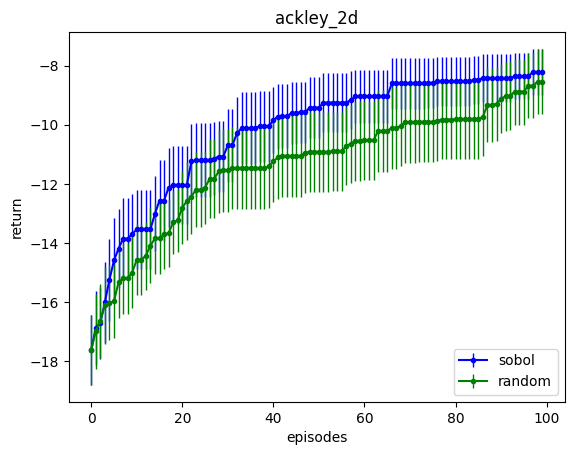

In [6]:
plot_results("exp_test","ackley_2d")